# CS6103 Assignment 3
## Machine Learning Diagnosis of Rice Leaf Diseases with scikit-learn
#### Jaime Pang, John Chai (M20604)

## Problem Description
Plant diseases are one of the major factors that lead to decreased yield and quality in agricultural crops, spelling a huge problem for farmers and endangering their livelihoods. In order to prevent loss of crops to diseases, it is imperative that farmers are able to accurately diagnose plant diseases quickly and administer the requisite treatment so as to mitigate the damage done to crops. However, it is difficult to ensure a constant monitoring of crops and even so, farmers might not be able to identify a disease on sight due to lack of experience. But with the advent of machine learning and agricultural AI, it is now possible to automate the detection of such diseases so that farmers can more efficiently mitigate the damage done to their crops by plant diseases.

## Dataset and Objectives
A dataset of images of diseased rice leaves was obtained from the UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Rice+Leaf+Diseases. The dataset was collected by Dharmsinh Desai University, Gujarat, India, and features images of rice plants afflicted with 3 types of diseases: Bacterial leaf blight, Brown spot and Leaf smut (Top to bottom). 
Each category contains 40 images of leaves. Of each set of 40, 36 were used for training and 4 were used for testing.
<img src="training/Bacterial leaf blight/DSC_0365.JPG" width="300px"><img src="training/Brown spot/DSC_0100.JPG" width="300px"><img src="training/Leaf smut/DSC_0309.JPG" width="300px">
 
The model here aims to be able to take a image of a diseased leaf as an input, and predict its corresponding disease type based on these 3 diseases. Thus this model is a classification model based on the 3 classes above.

In [1]:
import skimage
from skimage import io
import skimage.exposure
import skimage.transform
from skimage.color import rgb2gray
from skimage.filters import threshold_mean
from skimage import filters
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
np.set_printoptions(threshold=np.inf)

## Loading dataset
The dataset is loaded from the folder entitled 'training'. Each image is stored as a numpy array.

In [2]:
ic = io.imread_collection('training\*\*.jpg')
print(type(ic[0]))
y = np.asarray(40 * ['Bacterial leaf blight'] + 40 * ['Brown spot'] + 40 * ['Leaf smut'])
# print((y))

<class 'numpy.ndarray'>


#### Dataset pre-processing

(897, 3081, 3)
(897, 3081, 3)
(897, 3081, 3)
(897, 3081, 3)


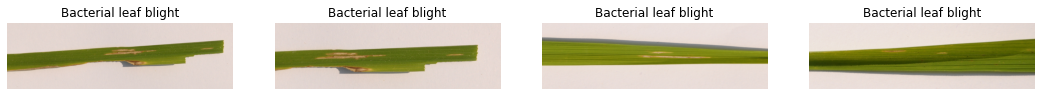

In [3]:
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for i in range(4):
    axes[i].axis('off')
    print(ic[i].shape)
    axes[i].imshow(ic[i])
    axes[i].set_title(y[i])

## Data preprocessing
Data needs to be processed first in order to eliminate any confounding variables in the images (e.g. brightness) that might confuse the training of the model and hinder the accuracy of predictions. Using skimage, the images are first cropped to 900 x 300 and the brightness is adjusted to standardise the colours of the background.

The function for resizing an image is defined here. For model training and testing, it is best to standardize the size of all the inputs so that size doesn't become a confounding factor in prediction. Apart from the resize function, the image can also be cropped so long as sufficient data remains.|

In [4]:
def resize(img):
    
    img = skimage.transform.resize(img, (300,900))
    #print(type(img))
    #print(img.shape)
    return (img)

The data is split into training and testing data so that we can check the validation accuracy later. X refers to our image data (in the form of numpy arrays) and Y are the corresponding labels.

Test size=0.1, meaning that 10% of the data (12 images out of 120) will form our testing dataset. The images will be randomly picked (shuffle=True) using the random number given (42)

In [5]:
#Split into train and test
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    ic,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=42,
)

X_train = np.asarray(X_train)
print(len(X_train))
print(type(X_train))
y_train = np.asarray(y_train)


108
<class 'numpy.ndarray'>


Training images are resized to (300,900,3)

In [6]:
for i in range(len(X_train)):
    X_train[i] = resize(X_train[i])
    print(X_train[i].shape)
    print(i)

(300, 900, 3)
0
(300, 900, 3)
1
(300, 900, 3)
2
(300, 900, 3)
3
(300, 900, 3)
4
(300, 900, 3)
5
(300, 900, 3)
6
(300, 900, 3)
7
(300, 900, 3)
8
(300, 900, 3)
9
(300, 900, 3)
10
(300, 900, 3)
11
(300, 900, 3)
12
(300, 900, 3)
13
(300, 900, 3)
14
(300, 900, 3)
15
(300, 900, 3)
16
(300, 900, 3)
17
(300, 900, 3)
18
(300, 900, 3)
19
(300, 900, 3)
20
(300, 900, 3)
21
(300, 900, 3)
22
(300, 900, 3)
23
(300, 900, 3)
24
(300, 900, 3)
25
(300, 900, 3)
26
(300, 900, 3)
27
(300, 900, 3)
28
(300, 900, 3)
29
(300, 900, 3)
30
(300, 900, 3)
31
(300, 900, 3)
32
(300, 900, 3)
33
(300, 900, 3)
34
(300, 900, 3)
35
(300, 900, 3)
36
(300, 900, 3)
37
(300, 900, 3)
38
(300, 900, 3)
39
(300, 900, 3)
40
(300, 900, 3)
41
(300, 900, 3)
42
(300, 900, 3)
43
(300, 900, 3)
44
(300, 900, 3)
45
(300, 900, 3)
46
(300, 900, 3)
47
(300, 900, 3)
48
(300, 900, 3)
49
(300, 900, 3)
50
(300, 900, 3)
51
(300, 900, 3)
52
(300, 900, 3)
53
(300, 900, 3)
54
(300, 900, 3)
55
(300, 900, 3)
56
(300, 900, 3)
57
(300, 900, 3)
58
(300, 9

Visualize the resized training images

(300, 900, 3)
(300, 900, 3)
(300, 900, 3)
(300, 900, 3)


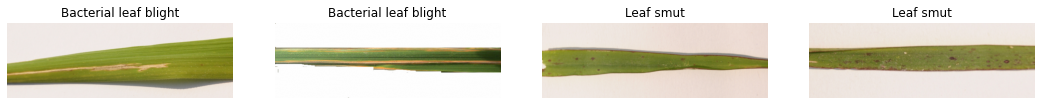

In [7]:
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(15,4)
fig.tight_layout()

for i in range(4):
    axes[i].axis('off')
    #axes[i].imshow(X_train[i])
    print(X_train[i].shape)
    axes[i].imshow(X_train[i])
    axes[i].set_title(y_train[i])
    

## Data Feature Extraction
Feature extraction allows us to reduce the dimensionality of our input data. This reduces computation time and makes it clearer for the machine to pick out important features in our data.

Histogram of Oriented Gradients (HOG) is used in this case to extract features from the image. HOG is a common feature extraction function which extracts the gradient and orientation of the edges in the image. These are generated in localized portions, and a histogram is generated for each. <a href='https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/'>This site</a> gives a more detailed explaination of how HOG is computed. The output of performing HOG on an image would look like below:
<img src='https://i.imgur.com/F9ui2Hn.png'  width = '300 px'/>

HOG was chosed as not only is it easy to run, but the number of features such as spots in the leaf would be able to be detected in the gradient vectors. However, the HOG had to be performed on very small localized areas in order to get a finer and more precise result.

In [8]:
from skimage.feature import hog

from sklearn.preprocessing import StandardScaler
def features(X_in):
    gray = np.array([skimage.color.rgb2gray(img) for img in X_in])
    red = np.array([img[:,:,0] for img in X_in])
    print(red.shape)
    print(gray.shape)
    hogt = np.array([ hog(x ,orientations=12,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys') for x in red])
    scale = StandardScaler()
    X_out = scale.fit_transform(hogt)
    return X_out

def hogi(img):
    gray = skimage.color.rgb2gray(img)
    #extract only the red channel from this image
    #red was selected as it is the colour of the features on the leaf
    red = np.array(img[:,:,0])
    hogt, hogi = hog(red ,orientations=12,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys', visualize = True)
    return hogi

In [9]:
X_train = features(X_train)
print(X_train.shape)

(108, 300, 900)
(108, 300, 900)
(108, 415800)


### HOG Support Vector Machine (SVM)

We train an SVM classifier on the HOG processed data and verify our results with test data from the earlier train test split.

In [10]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Prediction
We extract the HOG of the resized test images and let the model (clf) make predictions on it to get y_test0, the list of labels of the 12 images.

In [11]:
X_test0 = features([resize(x) for x in X_test])
y_test0 = clf.predict(X_test0)

(12, 300, 900)
(12, 300, 900)


Visualization of predictions. The predictions are presented in the title in the format "ground truth/prediction" (e.g. if the title of the image is 'Brown spot/Leaf smut', it means that the test image of Brown spot was predicted as Leaf smut by the model)

(323, 1504, 3)
(197, 699, 3)
(897, 3081, 3)
(104, 467, 3)
(897, 3081, 3)
(897, 3081, 3)
(897, 3081, 3)
(897, 3081, 3)
(250, 766, 3)
(200, 250, 3)
(897, 3081, 3)
(897, 3081, 3)
['Brown spot' 'Brown spot' 'Bacterial leaf blight' 'Leaf smut'
 'Bacterial leaf blight' 'Leaf smut' 'Brown spot' 'Bacterial leaf blight'
 'Brown spot' 'Leaf smut' 'Bacterial leaf blight' 'Leaf smut']


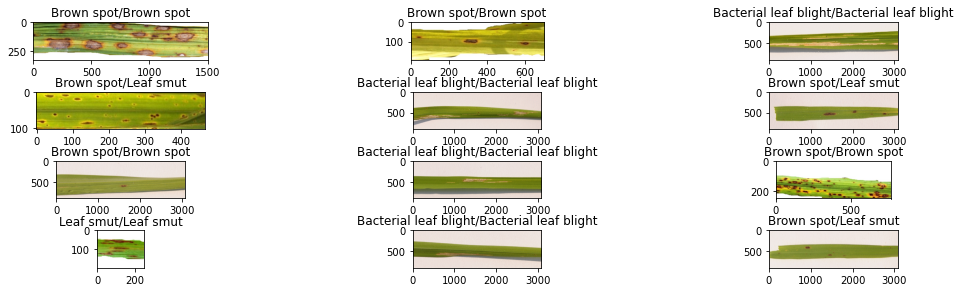

In [15]:
fig, axes = plt.subplots(4, 3)
fig.set_size_inches(15,4)
fig.tight_layout()

for i in range(4):
    for j in range(3):
        # axes[i].axis('off')
        print(X_test[i*3+j].shape)
        axes[i][j].imshow(X_test[i*3+j], cmap='Greys')
        axes[i][j].set_title(str(y_test[i*3+j])+"/"+str(y_test0[i*3+j]))
print(y_test0)

### Visualization of HOG outputs (optional for visualization purposes)

In [16]:
#for visualization purposes
xt = [hogi(resize(x)) for x in X_test]

This is what the HOG outputs of each test image look like.

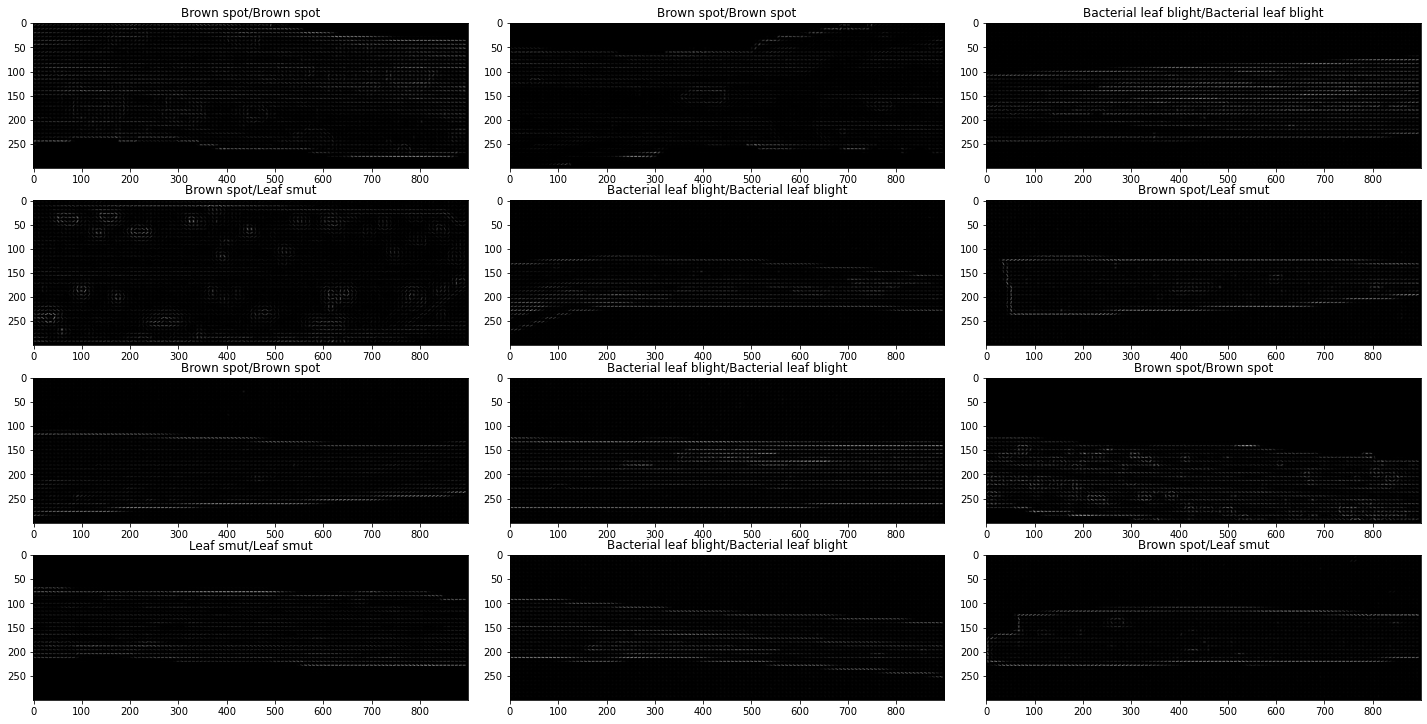

In [17]:
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(4, 3)
fig.set_size_inches(20,10)
fig.tight_layout()
 

for i in range(4):
    for j in range(3):
        # axes[i].axis('off')
        # xt = [skimage.transform.resize(x, (100,300)) for x in X_test]
        # print(xt[i*3+j].shape)
        axes[i][j].imshow(xt[i*3+j], cmap='gray')
        axes[i][j].set_title(str(y_test[i*3+j])+"/"+str(y_test0[i*3+j]))


## Saving the model
The model is saved for access again later

In [18]:
import joblib
filename = 'finalized_model.joblib'
joblib.dump(clf, filename)

['finalized_model.joblib']

This prints just the validation accuracy with the testing dataset, but loaded_model can also be used again to predict new input images with loaded_model.predict(image)

In [49]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test0, y_test)
print(result)

0.75


### Predict from saved model

(2, 300, 900)
(2, 300, 900)
predictions:['Bacterial leaf blight' 'Brown spot']


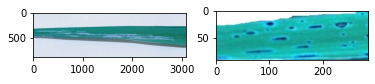

In [57]:
import joblib
loaded_model = joblib.load('finalized_model.joblib')
image1 = cv2.imread("training/Bacterial Leaf Blight/DSC_0406.JPG")
image2 = cv2.imread("training/Brown Spot/DSC_0115.JPG")

fig, axes = plt.subplots(1, 2)
axes[0].imshow(image1)
axes[1].imshow(image2)
image1 = resize(image1)
image2 = resize(image2)

#image features are extracted
test_features = features([image1, image2])
#print(test_features[0].shape)

pred = loaded_model.predict(test_features)
print('predictions:' + str(pred))

## References
[1] https://blog.hyperiondev.com/index.php/2019/02/18/machine-learning/

[2] https://kapernikov.com/tutorial-image-classification-with-scikit-learn/

[3] https://www.kaggle.com/rio114/cropping-with-normlized-aspect-ratio